# Timeseries - Manual in R

## Plotting TS

In [1]:
kings = scan("http://robjhyndman.com/tsdldata/misc/kings.dat",skip=3)
kings

[1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56

- Use ts() to convert ot to timeseries data

- Sometimes the time series data set that you have may have been collected at regular intervals that were less than one year, for example, monthly or quarterly. In this case, you can specify the number of times that data was collected per year by using the ‘frequency’ parameter in the ts() function. For monthly time series data, you set frequency=12, while for quarterly time series data, you set frequency=4.

- You can also specify the first year that the data was collected, and the first interval in that year by using the ‘start’ parameter in the ts() function. For example, if the first data point corresponds to the second quarter of 1986, you would set start=c(1986,2).

In [2]:
print(ts(kings))

Time Series:
Start = 1 
End = 42 
Frequency = 1 
 [1] 60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59 48
[26] 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56


In [8]:
births = scan("http://robjhyndman.com/tsdldata/data/nybirths.dat")
birthstimeseries = ts(births, frequency=12, start=c(1946,1))
birthstimeseries

        Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct
1946 26.663 23.598 26.931 24.740 25.806 24.364 24.477 23.901 23.175 23.227
1947 21.439 21.089 23.709 21.669 21.752 20.761 23.479 23.824 23.105 23.110
1948 21.937 20.035 23.590 21.672 22.222 22.123 23.950 23.504 22.238 23.142
1949 21.548 20.000 22.424 20.615 21.761 22.874 24.104 23.748 23.262 22.907
1950 22.604 20.894 24.677 23.673 25.320 23.583 24.671 24.454 24.122 24.252
1951 23.287 23.049 25.076 24.037 24.430 24.667 26.451 25.618 25.014 25.110
1952 23.798 22.270 24.775 22.646 23.988 24.737 26.276 25.816 25.210 25.199
1953 24.364 22.644 25.565 24.062 25.431 24.635 27.009 26.606 26.268 26.462
1954 24.657 23.304 26.982 26.199 27.210 26.122 26.706 26.878 26.152 26.379
1955 24.990 24.239 26.721 23.475 24.767 26.219 28.361 28.599 27.914 27.784
1956 26.217 24.218 27.914 26.975 28.527 27.139 28.982 28.169 28.056 29.136
1957 26.589 24.848 27.543 26.896 28.878 27.390 28.065 28.141 29.048 28.484
1958 27.132 24.924 28.963

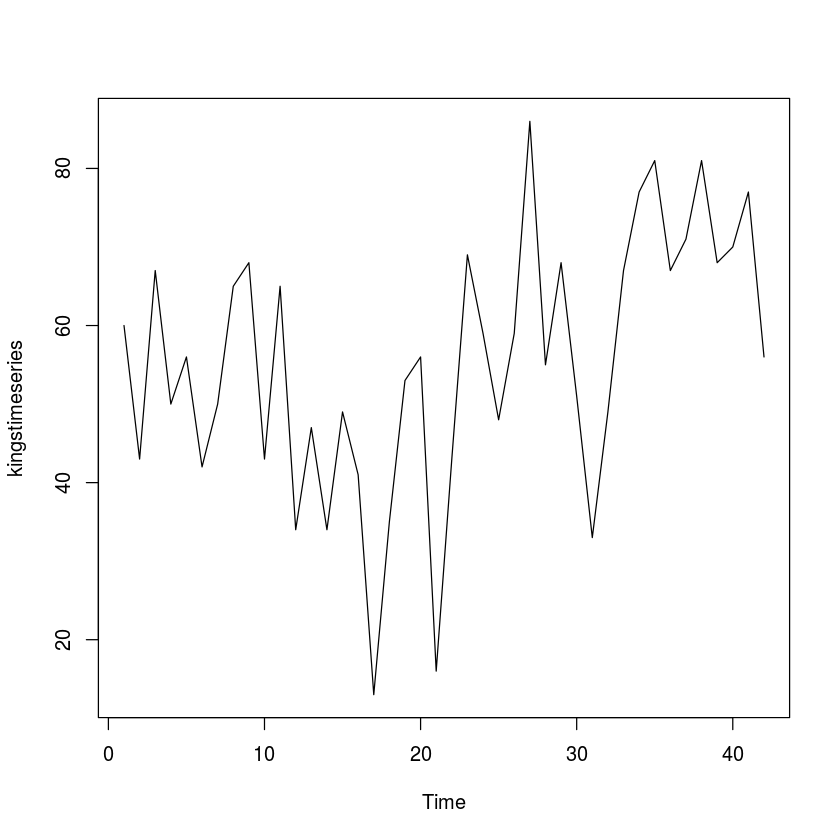

In [9]:
kingstimeseries = ts(kings)
plot.ts(kingstimeseries)

### Additive Timeseries model

Seasonal fluctuations are constant

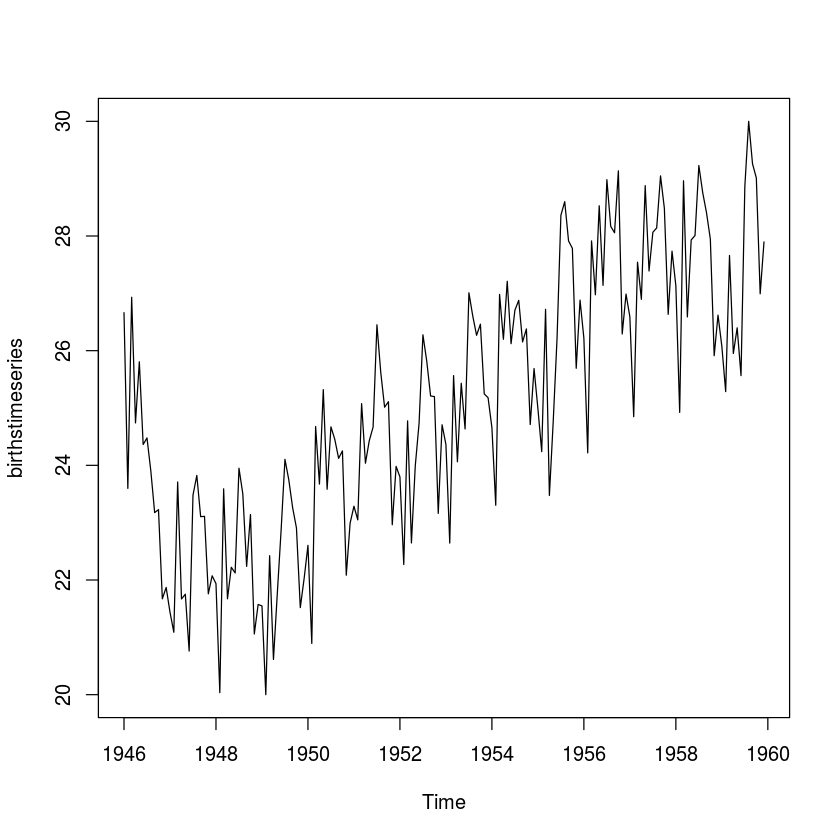

In [10]:
plot.ts(birthstimeseries)

### Multiplicatice timeseries

The magnitude varies with time. Transforming via log may help use an additive model

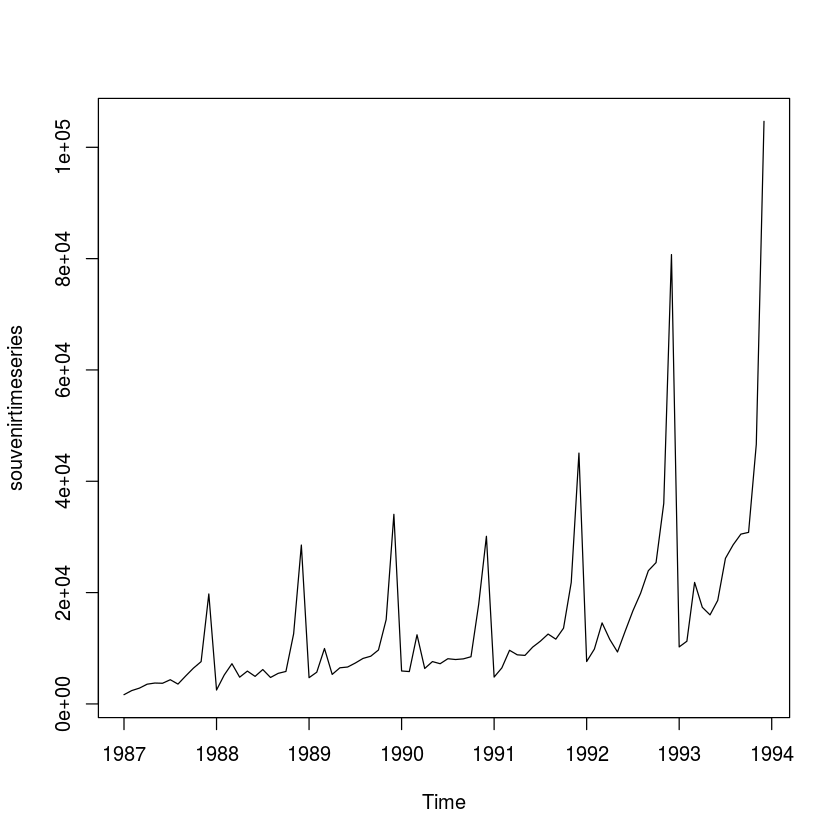

In [13]:
souvenir = scan("http://robjhyndman.com/tsdldata/data/fancy.dat")
souvenirtimeseries = ts(souvenir, frequency=12, start=c(1987,1))
plot(souvenirtimeseries)

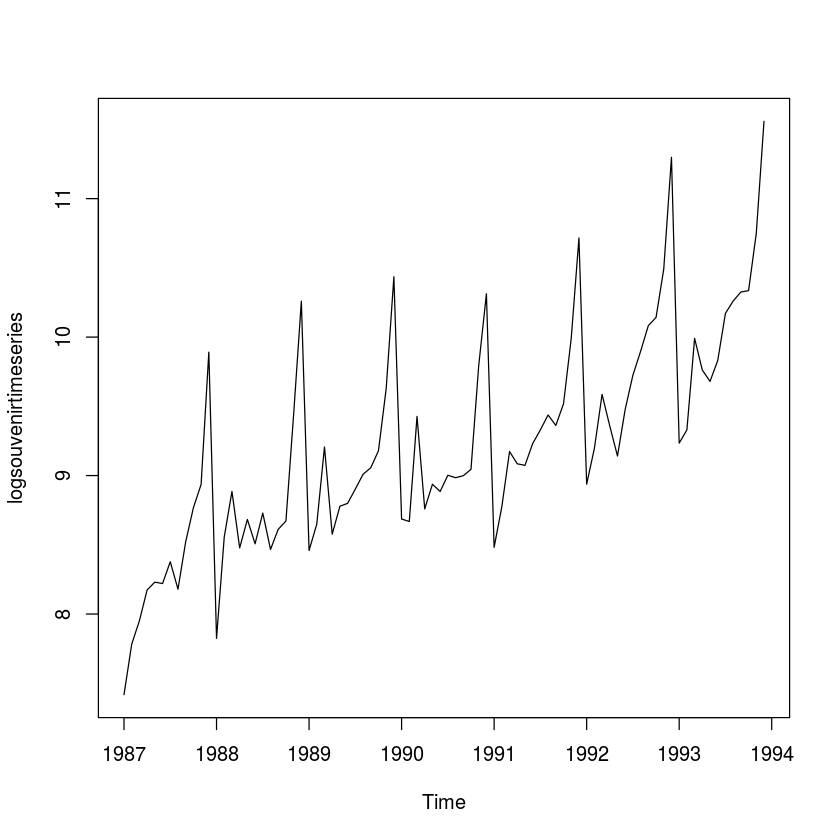

In [14]:
logsouvenirtimeseries = log(souvenirtimeseries)
plot.ts(logsouvenirtimeseries)

## STL Decomposition

In [15]:
library(TTR)

You can then use the “SMA()” function to smooth time series data. To use the SMA() function, you need to specify the order (span) of the simple moving average, using the parameter “n”.

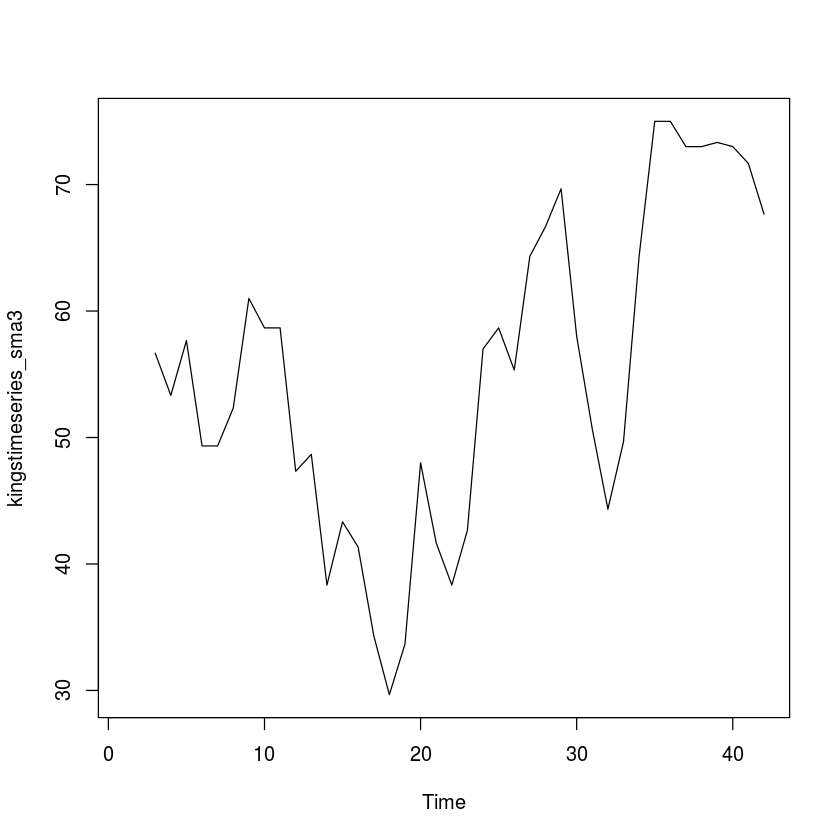

In [18]:
kingstimeseries_sma3 = SMA(kingstimeseries, n=3)
plot(kingstimeseries_sma3)

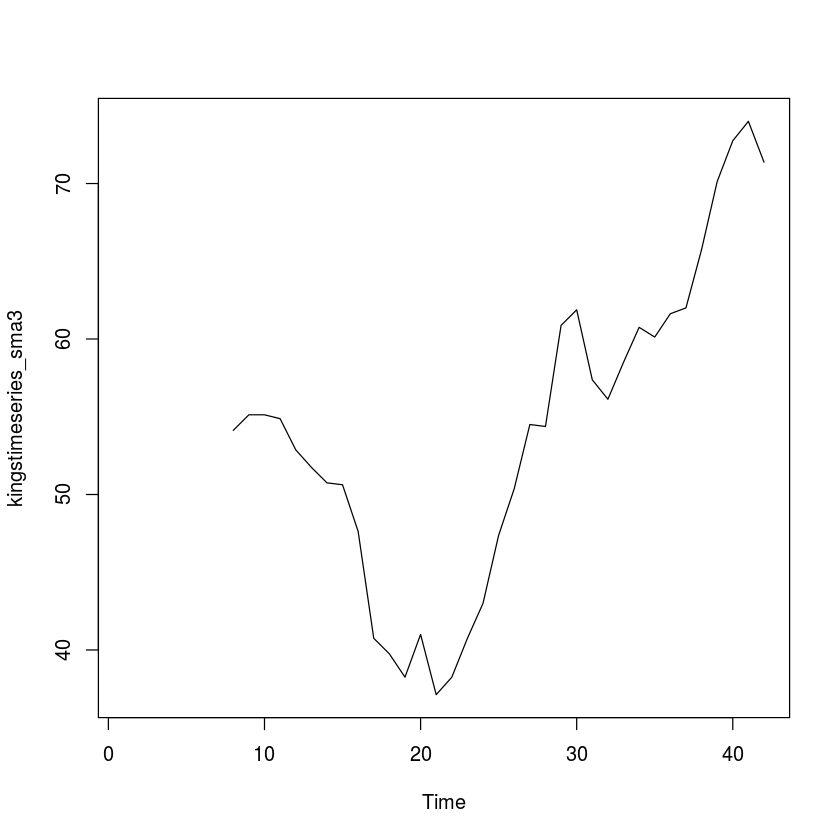

In [19]:
kingstimeseries_sma3 = SMA(kingstimeseries, n=8)
plot(kingstimeseries_sma3)

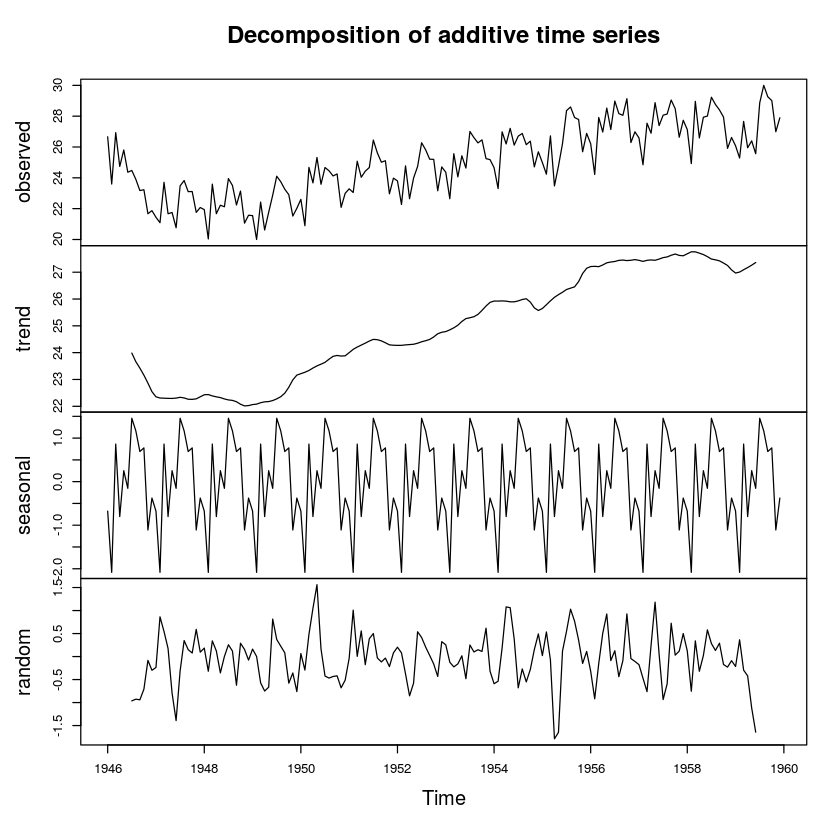

In [20]:
# Decompose

birthstimeseries_decompose = decompose(birthstimeseries)
plot(birthstimeseries_decompose)

In [21]:
birthstimeseries_decompose$seasonal
birthstimeseries_decompose$trend

            Jan        Feb        Mar        Apr        May        Jun
1946 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1947 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1948 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1949 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1950 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1951 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1952 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1953 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1954 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1955 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1956 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1957 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1958 -0.6771947 -2.0829607  0.8625232 -0.8016787  0.2516514 -0.1532556
1959 -

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1946       NA       NA       NA       NA       NA       NA 23.98433 23.66213
1947 22.35350 22.30871 22.30258 22.29479 22.29354 22.30562 22.33483 22.31167
1948 22.43038 22.43667 22.38721 22.35242 22.32458 22.27458 22.23754 22.21988
1949 22.06375 22.08033 22.13317 22.16604 22.17542 22.21342 22.27625 22.35750
1950 23.21663 23.26967 23.33492 23.42679 23.50638 23.57017 23.63888 23.75713
1951 24.00083 24.12350 24.20917 24.28208 24.35450 24.43242 24.49496 24.48379
1952 24.27204 24.27300 24.28942 24.30129 24.31325 24.35175 24.40558 24.44475
1953 24.78646 24.84992 24.92692 25.02362 25.16308 25.26963 25.30154 25.34125
1954 25.92446 25.92317 25.92967 25.92137 25.89567 25.89458 25.92963 25.98246
1955 25.64612 25.78679 25.93192 26.06388 26.16329 26.25388 26.35471 26.40496
1956 27.21104 27.21900 27.20700 27.26925 27.35050 27.37983 27.39975 27.44150
1957 27.44221 27.40283 27.44300 27.45717 27.44429 27.48975 27.54354 27.56933

### Seasonal adjustments

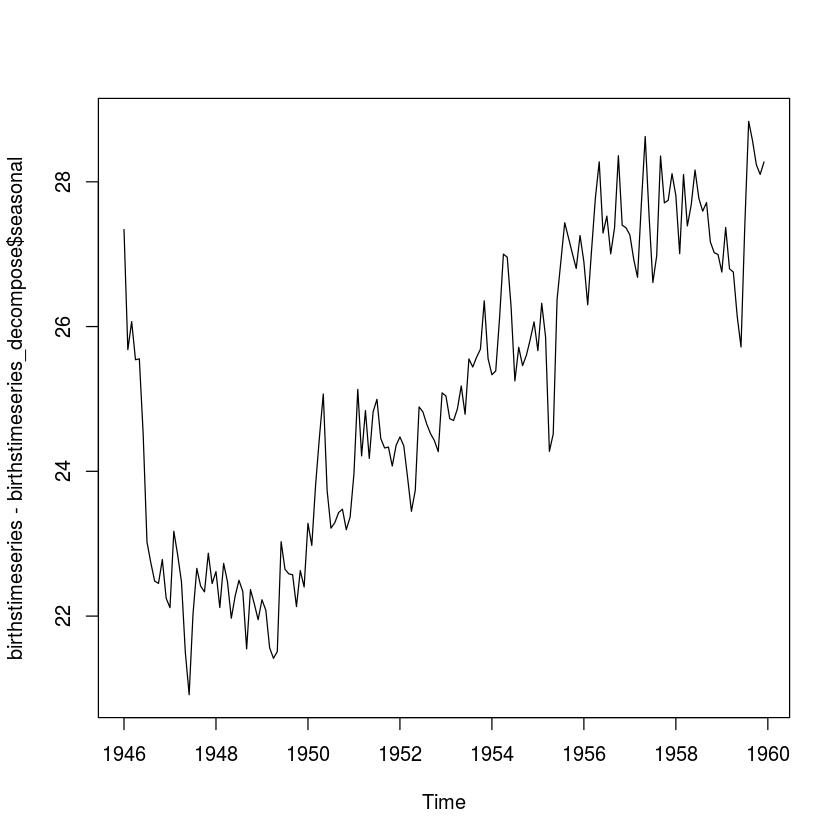

In [22]:
plot(birthstimeseries - birthstimeseries_decompose$seasonal)

## Forecasting and Exponential Smoothing Methods

**Simple Exponential Smoothing**


If you have a time series that can be described using an additive model with constant level and no seasonality, you can use simple exponential smoothing to make short-term forecasts.

The simple exponential smoothing method provides a way of estimating the level at the current time point. Smoothing is controlled by the parameter alpha; for the estimate of the level at the current time point. The value of alpha; lies between 0 and 1. Values of alpha that are close to 0 mean that little weight is placed on the most recent observations when making forecasts of future values.

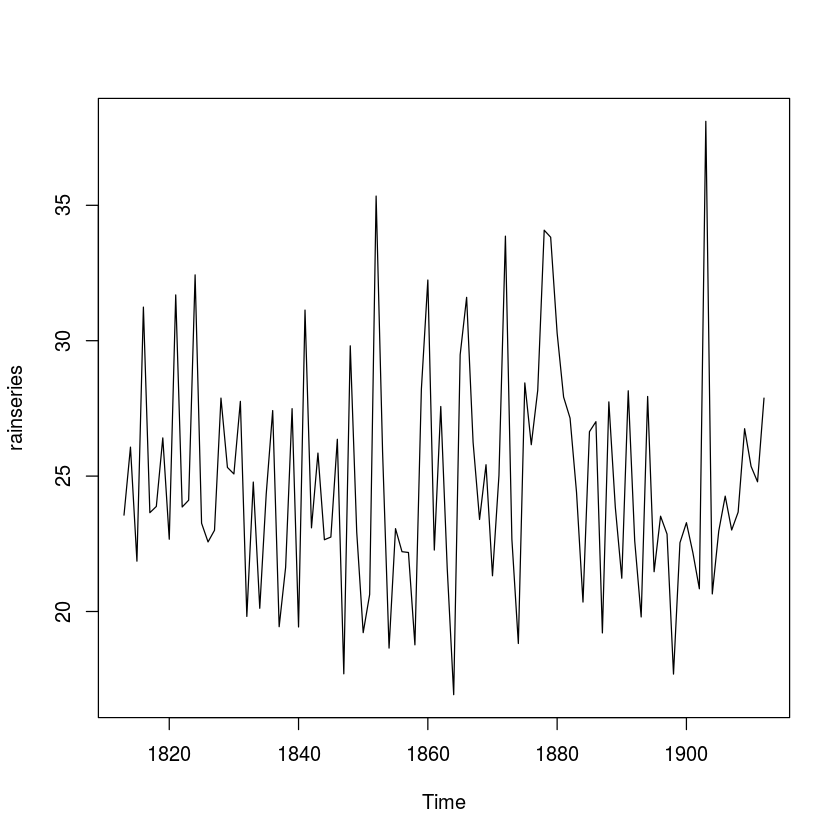

In [24]:
rain = scan("http://robjhyndman.com/tsdldata/hurst/precip1.dat",skip=1)
rainseries = ts(rain,start=c(1813))
plot.ts(rainseries)

To make forecasts using simple exponential smoothing in R, we can fit a simple exponential smoothing predictive model using the “HoltWinters()” function in R. To use HoltWinters() for simple exponential smoothing, we need to set the parameters beta=FALSE and gamma=FALSE in the HoltWinters() function (the beta and gamma parameters are used for Holt’s exponential smoothing, or Holt-Winters exponential smoothing, as described below).

In [27]:
rainseriesforecasts = HoltWinters(rainseries, beta=FALSE, gamma=FALSE)
rainseriesforecasts


Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = rainseries, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.02412151
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 24.67819

xhat,level
23.56000,23.56000
23.62054,23.62054
23.57808,23.57808
23.76290,23.76290
23.76017,23.76017
23.76306,23.76306


[1] 1828.855

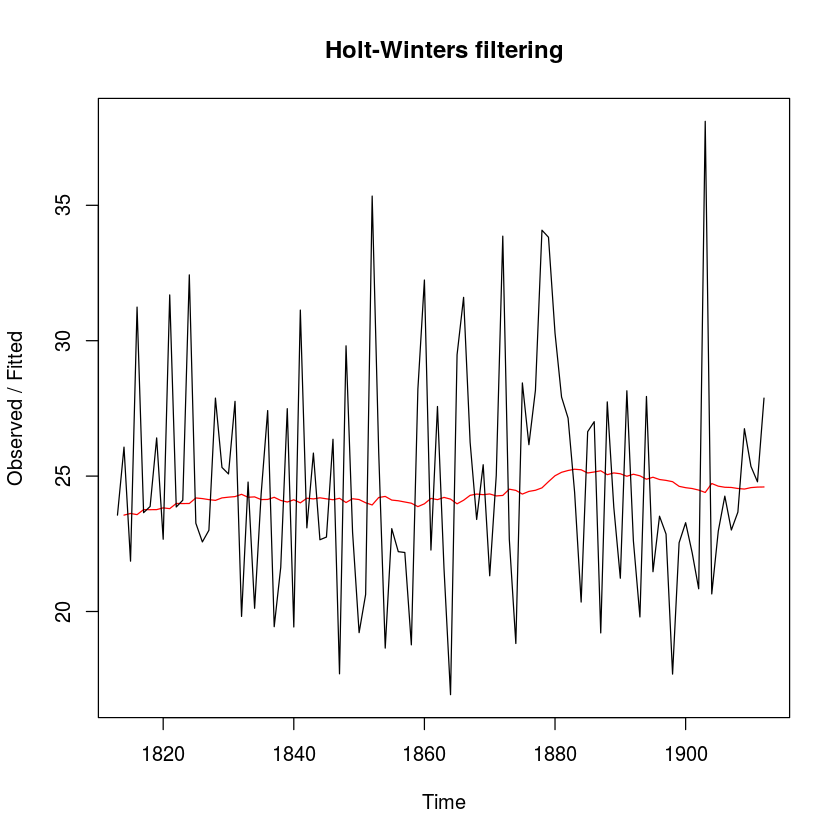

In [34]:
head(rainseriesforecasts$fitted) # it fits on the train data from the second element
plot(rainseriesforecasts)
rainseriesforecasts$SSE

In [37]:
library(forecast)

     Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
1913       24.67819 19.17493 30.18145 16.26169 33.09470
1914       24.67819 19.17333 30.18305 16.25924 33.09715
1915       24.67819 19.17173 30.18465 16.25679 33.09960
1916       24.67819 19.17013 30.18625 16.25434 33.10204
1917       24.67819 19.16853 30.18785 16.25190 33.10449
1918       24.67819 19.16694 30.18945 16.24945 33.10694
1919       24.67819 19.16534 30.19105 16.24701 33.10938
1920       24.67819 19.16374 30.19265 16.24456 33.11182

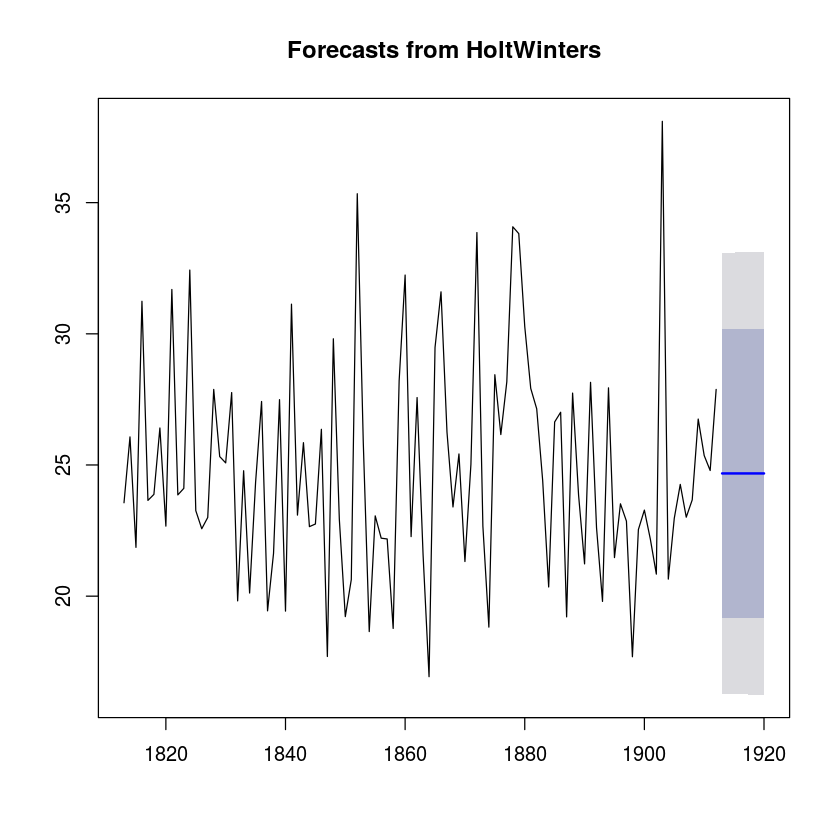

In [43]:
rainseriesforecasts2 = forecast(rainseriesforecasts, h=8)
rainseriesforecasts2
plot(rainseriesforecasts2)

If the predictive model cannot be improved upon, there should be no correlations between forecast errors for successive predictions. In other words, if there are correlations between forecast errors for successive predictions, it is likely that the simple exponential smoothing forecasts could be improved upon by another forecasting technique.

To figure out whether this is the case, we can obtain a correlogram of the in-sample forecast errors for lags 1-20. We can calculate a correlogram of the forecast errors using the “acf()” function in R. To specify the maximum lag that we want to look at, we use the “lag.max” parameter in acf().

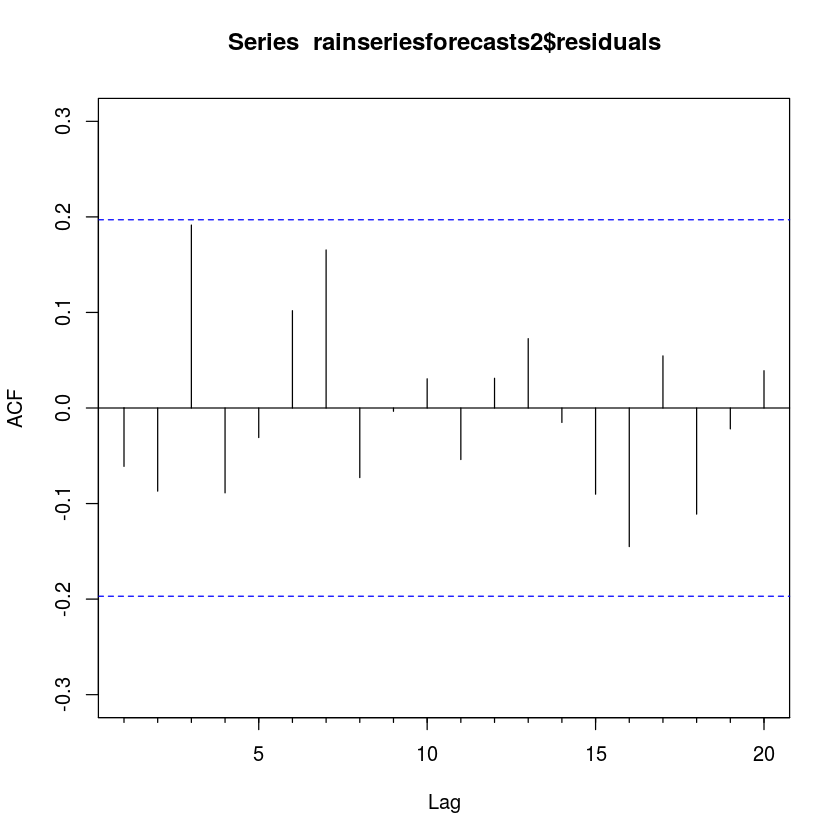

In [52]:
Acf(rainseriesforecasts2$residuals, lag.max = 20)

You can see from the sample correlogram that the autocorrelation at lag 3 is just touching the significance bounds. To test whether there is significant evidence for non-zero correlations at lags 1-20, we can carry out a Ljung-Box test. This can be done in R using the “Box.test()”, function. The maximum lag that we want to look at is specified using the “lag” parameter in the Box.test() function. For example, to test whether there are non-zero autocorrelations at lags 1-20, for the in-sample forecast errors for London rainfall data, we type:

In [53]:
Box.test(rainseriesforecasts2$residuals, lag=20, type="Ljung-Box")



	Box-Ljung test

data:  rainseriesforecasts2$residuals
X-squared = 17.401, df = 20, p-value = 0.6268


Here the Ljung-Box test statistic is 17.4, and the p-value is 0.6, so there is little evidence of non-zero autocorrelations in the in-sample forecast errors at lags 1-20.

Plot Residuals. Check for normality of residuals

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.
Warning message:
“Removed 1 rows containing non-finite values (stat_qq).”

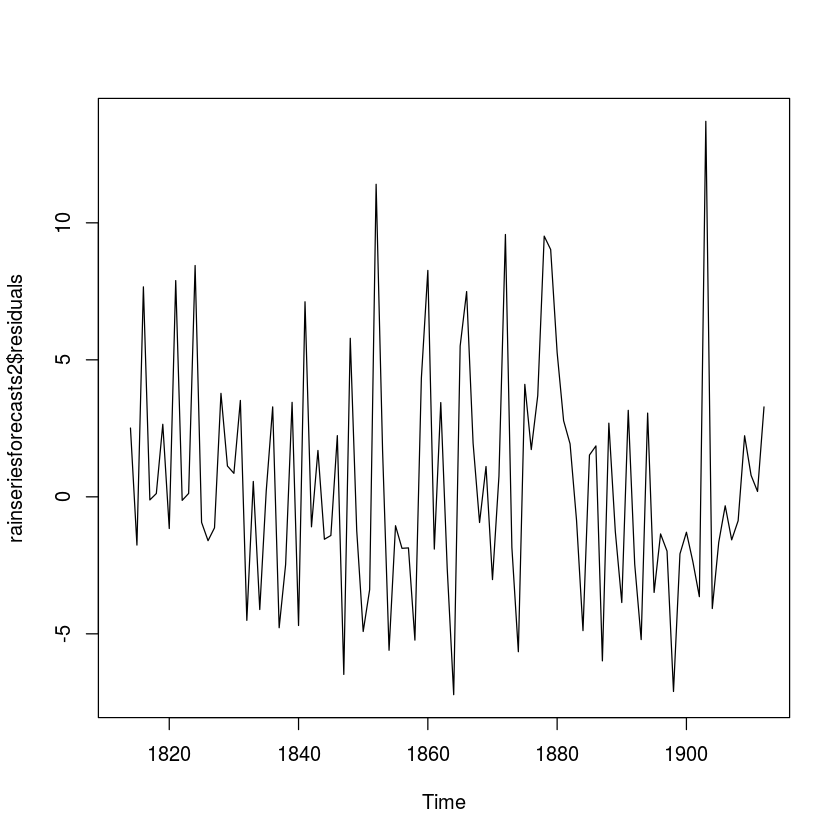

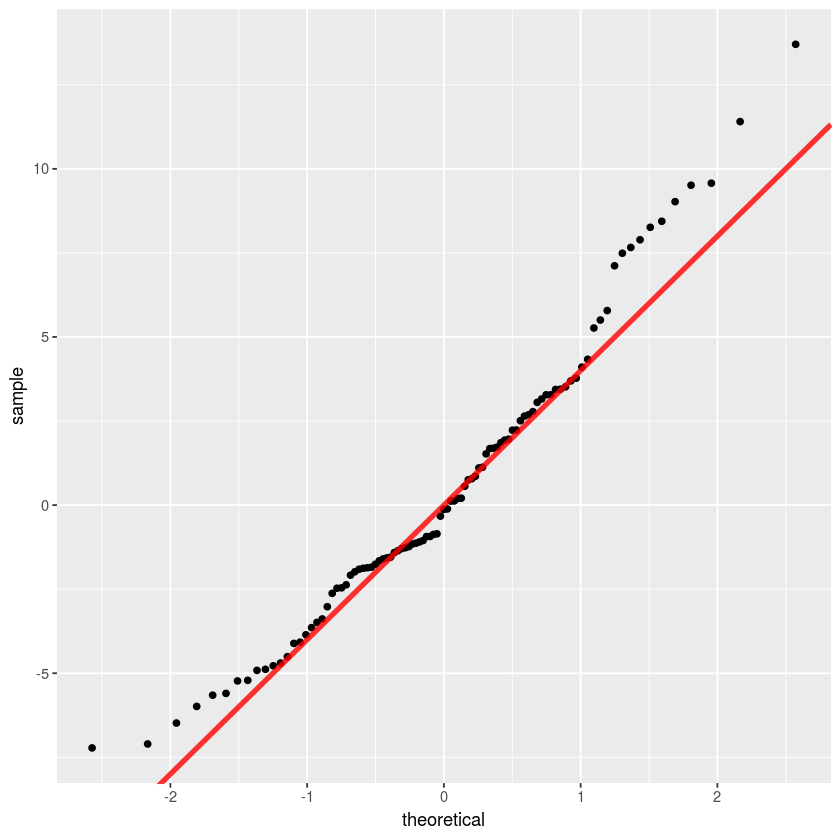

In [69]:
library(ggplot2)

plot.ts(rainseriesforecasts2$residuals)

ggplot() +
    geom_qq(aes(sample = rainseriesforecasts2$residuals)) +
    geom_abline(intercept = 0, slope = 4,
                color = "red", size = 1.5, alpha = 0.8)

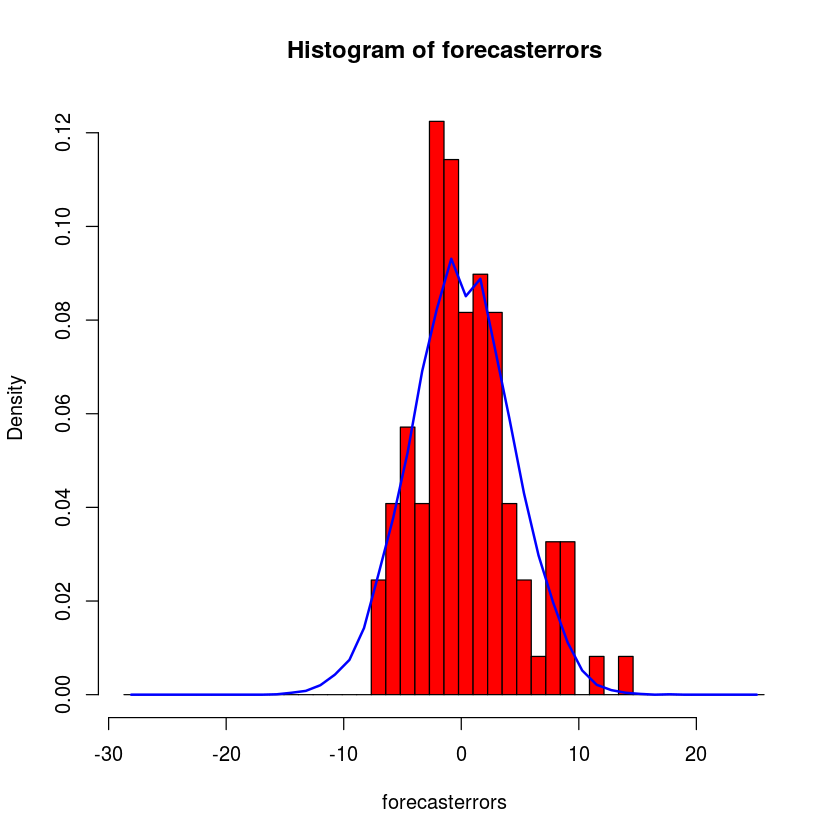

In [88]:
plotForecastErrors <- function(forecasterrors)
  {
     # make a histogram of the forecast errors:
     mybinsize <- IQR(forecasterrors, na.rm = T)/4
     mysd   <- sd(forecasterrors, na.rm = T)
     mymin  <- min(forecasterrors, na.rm = T) - mysd*5
     mymax  <- max(forecasterrors, na.rm = T) + mysd*3
     # generate normally distributed data with mean 0 and standard deviation mysd
     mynorm <- rnorm(10000, mean=0, sd=mysd)
     mymin2 <- min(mynorm, na.rm = T)
     mymax2 <- max(mynorm, na.rm = T)
     if (mymin2 < mymin) { mymin <- mymin2 }
     if (mymax2 > mymax) { mymax <- mymax2 }
     # make a red histogram of the forecast errors, with the normally distributed data overlaid:
     mybins <- seq(mymin, mymax, mybinsize)
     hist(forecasterrors, col="red", freq=FALSE, breaks=mybins)
     # freq=FALSE ensures the area under the histogram = 1
     # generate normally distributed data with mean 0 and standard deviation mysd
     myhist <- hist(mynorm, plot=FALSE, breaks=mybins)
     # plot the normal curve as a blue line on top of the histogram of forecast errors:
     points(myhist$mids, myhist$density, type="l", col="blue", lwd=2)
  }

plotForecastErrors(rainseriesforecasts2$residuals)

### Holt’s Exponential Smoothing


** Used when there is Trend and no seasonality **

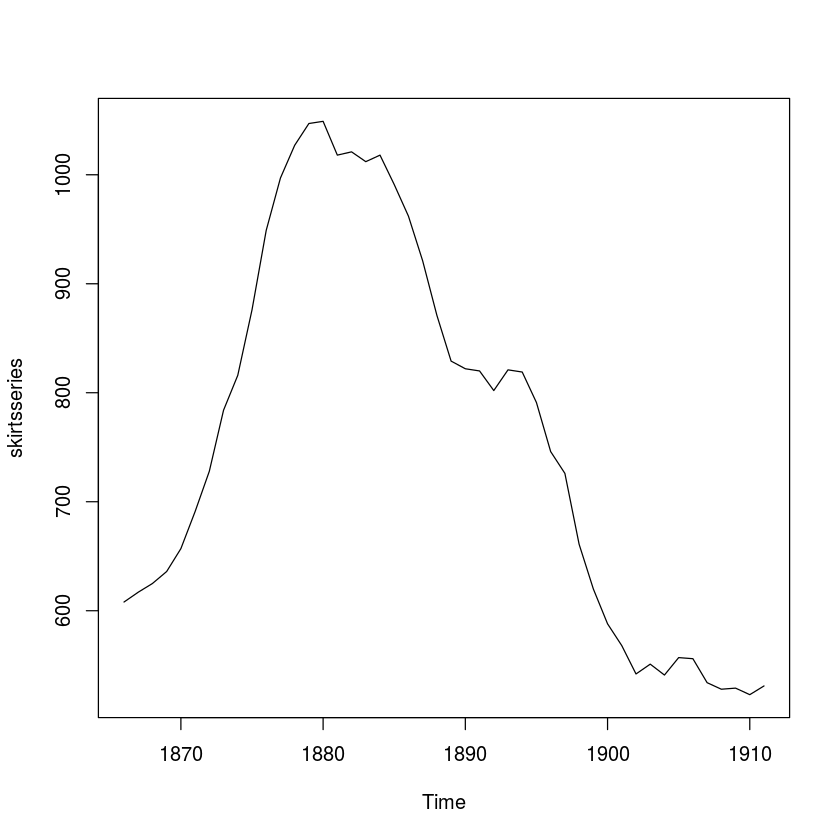

In [89]:
skirts = scan("http://robjhyndman.com/tsdldata/roberts/skirts.dat",skip=5)
skirtsseries = ts(skirts,start=c(1866))
plot.ts(skirtsseries)

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = skirts, gamma = F)

Smoothing parameters:
 alpha: 0.8383481
 beta : 1
 gamma: FALSE

Coefficients:
        [,1]
a 529.308585
b   5.690464

[1] 16954.18

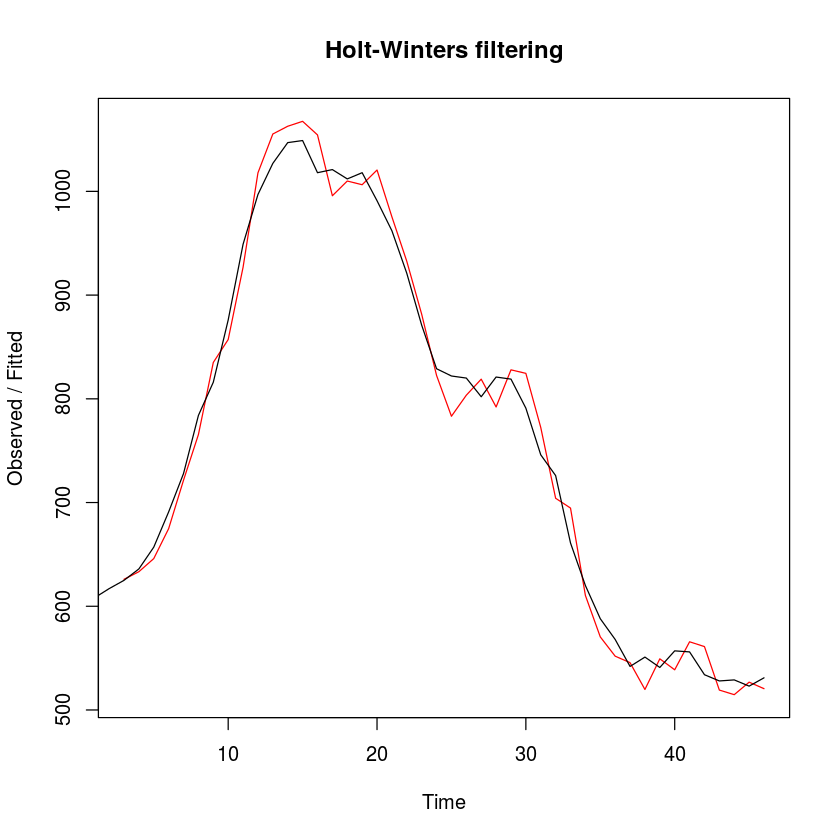

In [92]:
skirtsseriesforecasts = HoltWinters(skirts, gamma = F)
skirtsseriesforecasts
skirtsseriesforecasts$SSE
plot(skirtsseriesforecasts)

The estimated value of alpha is 0.84, and of beta is 1.00. These are both high, telling us that both the estimate of the current value of the level, and of the slope b of the trend component, are based mostly upon very recent observations in the time series. This makes good intuitive sense, since the level and the slope of the time series both change quite a lot over time. The value of the sum-of-squared-errors for the in-sample forecast errors is 16954.

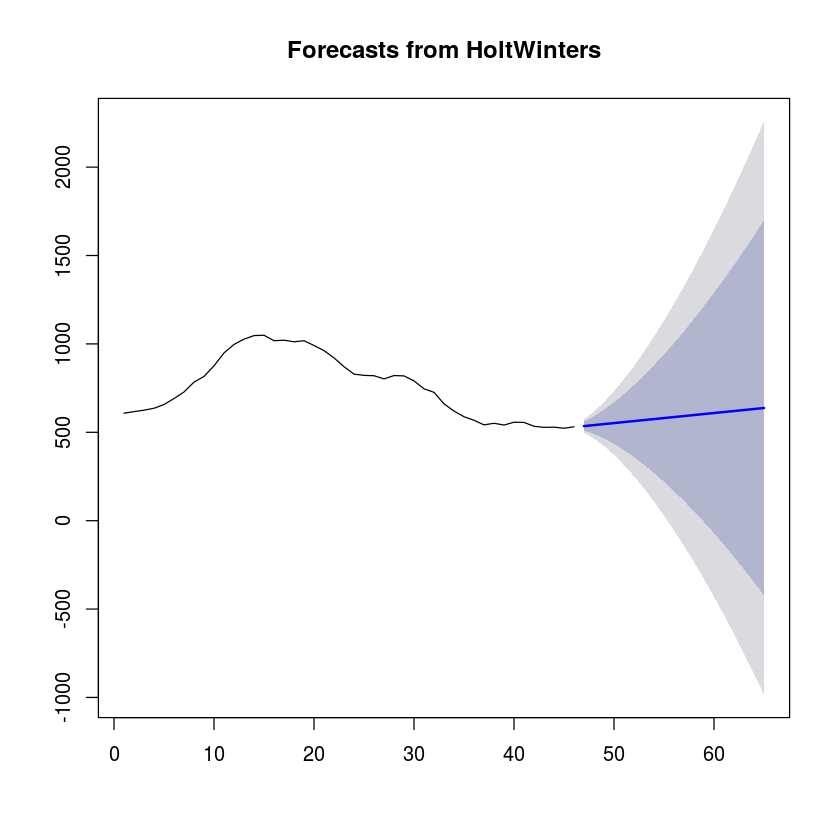

In [97]:
skirtsseriesforecasts2 = forecast(skirtsseriesforecasts, gamma=F, h=19)
plot(skirtsseriesforecasts2)



	Box-Ljung test

data:  skirtsseriesforecasts2$residuals
X-squared = 19.731, df = 20, p-value = 0.4749


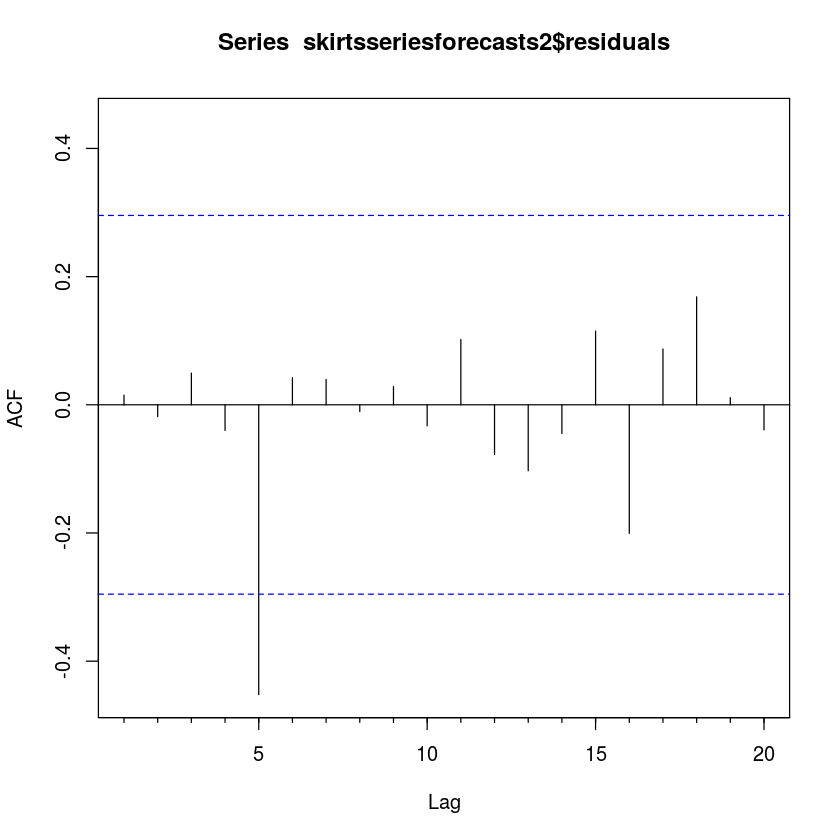

In [99]:
Acf(skirtsseriesforecasts2$residuals, lag.max=20)
Box.test(skirtsseriesforecasts2$residuals, lag=20, type="Ljung-Box")


Here the correlogram shows that the sample autocorrelation for the in-sample forecast errors at lag 5 exceeds the significance bounds. However, we would expect one in 20 of the autocorrelations for the first twenty lags to exceed the 95% significance bounds by chance alone. Indeed, when we carry out the Ljung-Box test, the p-value is 0.47, indicating that there is little evidence of non-zero autocorrelations in the in-sample forecast errors at lags 1-20.



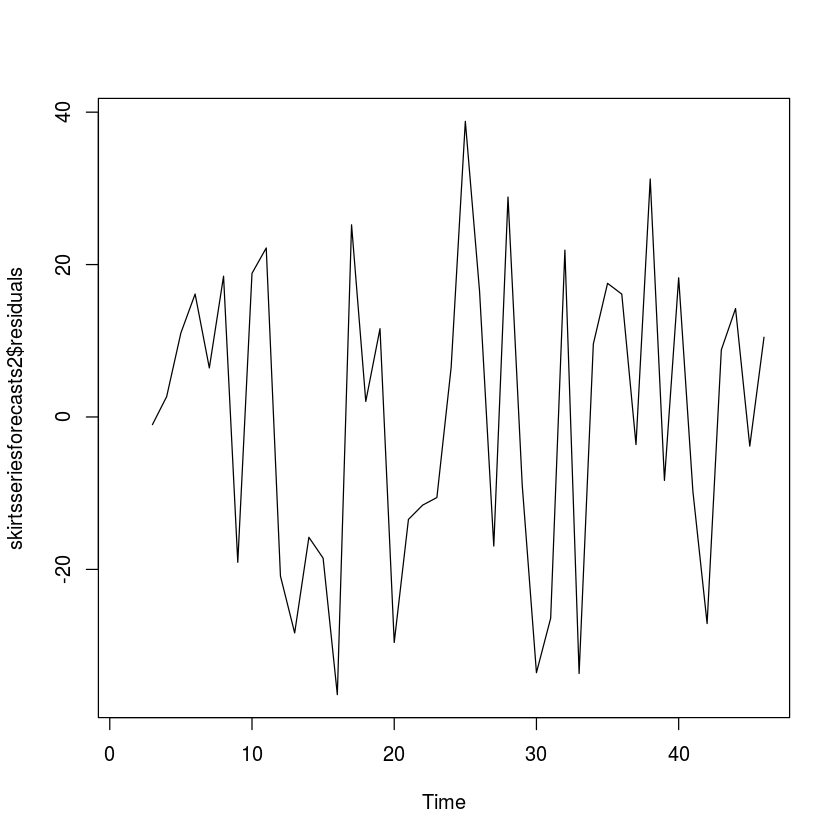

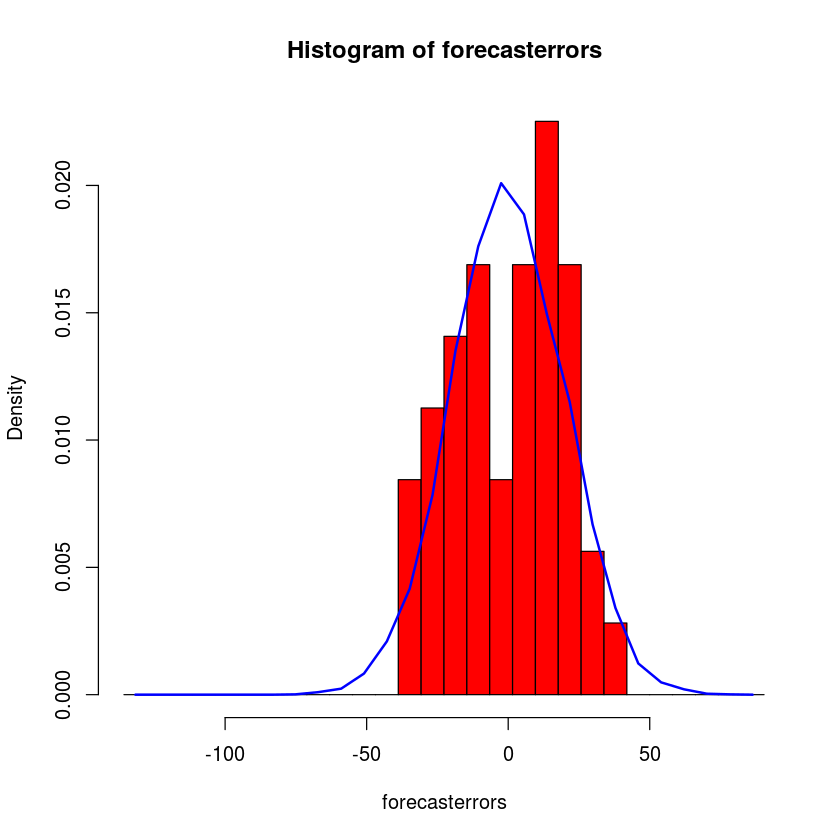

In [100]:
plot.ts(skirtsseriesforecasts2$residuals)            # make a time plot
plotForecastErrors(skirtsseriesforecasts2$residuals) # make a histogram

### Holt-Winters Exponential Smoothing

** If you have a time series that can be described using an additive model with increasing or decreasing trend and seasonality, you can use Holt-Winters exponential smoothing to make short-term forecasts.**


Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = logsouvenirtimeseries)

Smoothing parameters:
 alpha: 0.413418
 beta : 0
 gamma: 0.9561275

Coefficients:
           [,1]
a   10.37661961
b    0.02996319
s1  -0.80952063
s2  -0.60576477
s3   0.01103238
s4  -0.24160551
s5  -0.35933517
s6  -0.18076683
s7   0.07788605
s8   0.10147055
s9   0.09649353
s10  0.05197826
s11  0.41793637
s12  1.18088423

[1] 2.011491

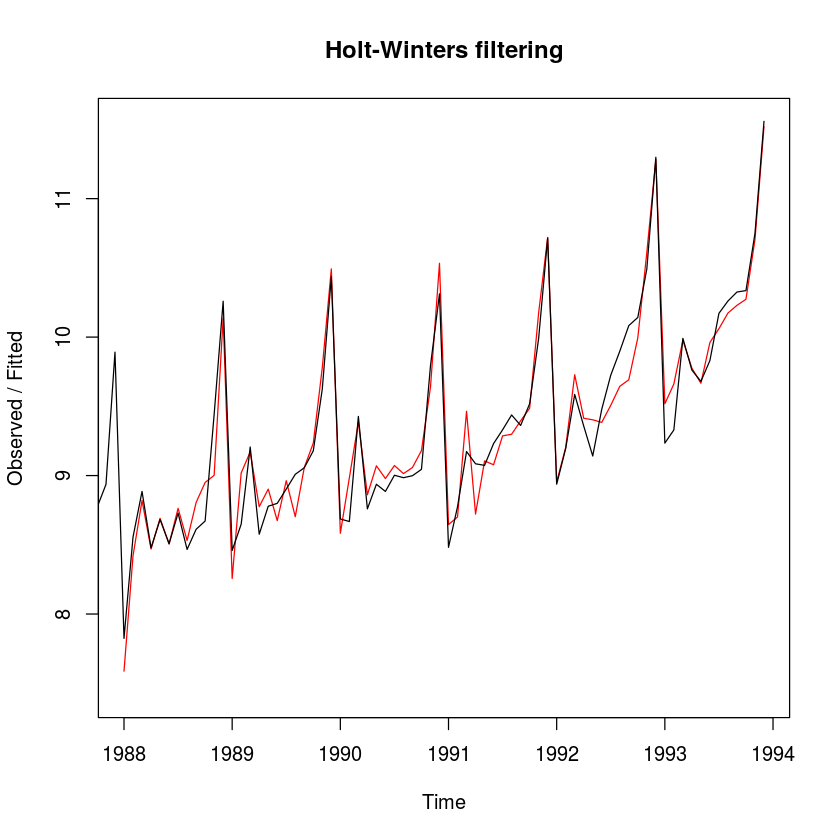

In [103]:
logsouvenirtimeseries <- log(souvenirtimeseries)
souvenirtimeseriesforecasts <- HoltWinters(logsouvenirtimeseries)
souvenirtimeseriesforecasts
souvenirtimeseriesforecasts$SSE
plot(souvenirtimeseriesforecasts)

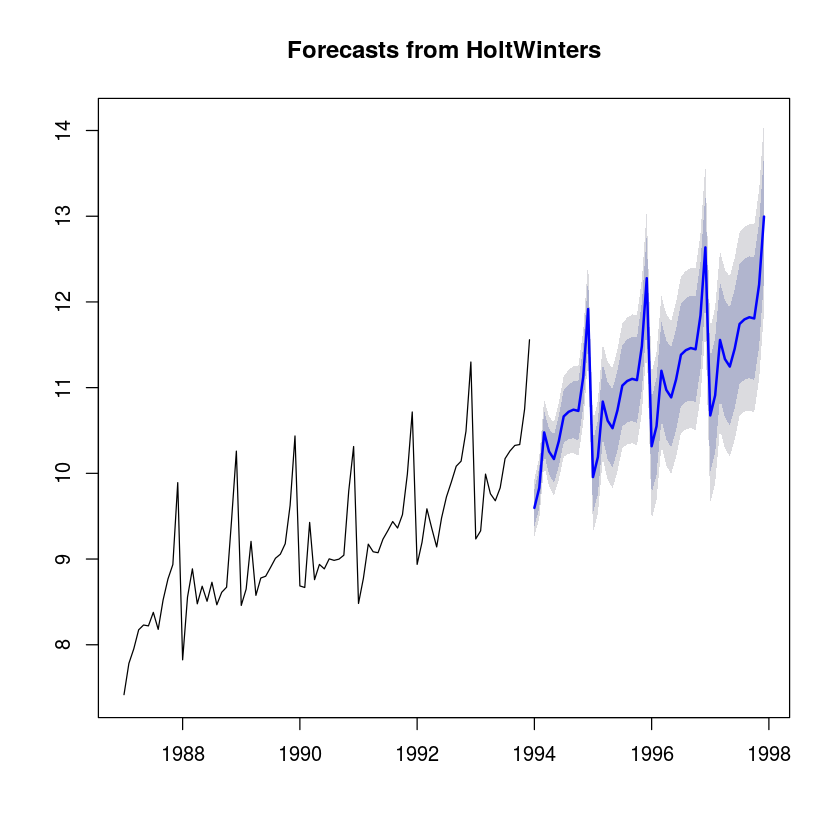

In [105]:
souvenirtimeseriesforecasts2 <- forecast(souvenirtimeseriesforecasts, h=48)
plot(souvenirtimeseriesforecasts2)


	Box-Ljung test

data:  souvenirtimeseriesforecasts2$residuals
X-squared = 17.53, df = 20, p-value = 0.6183


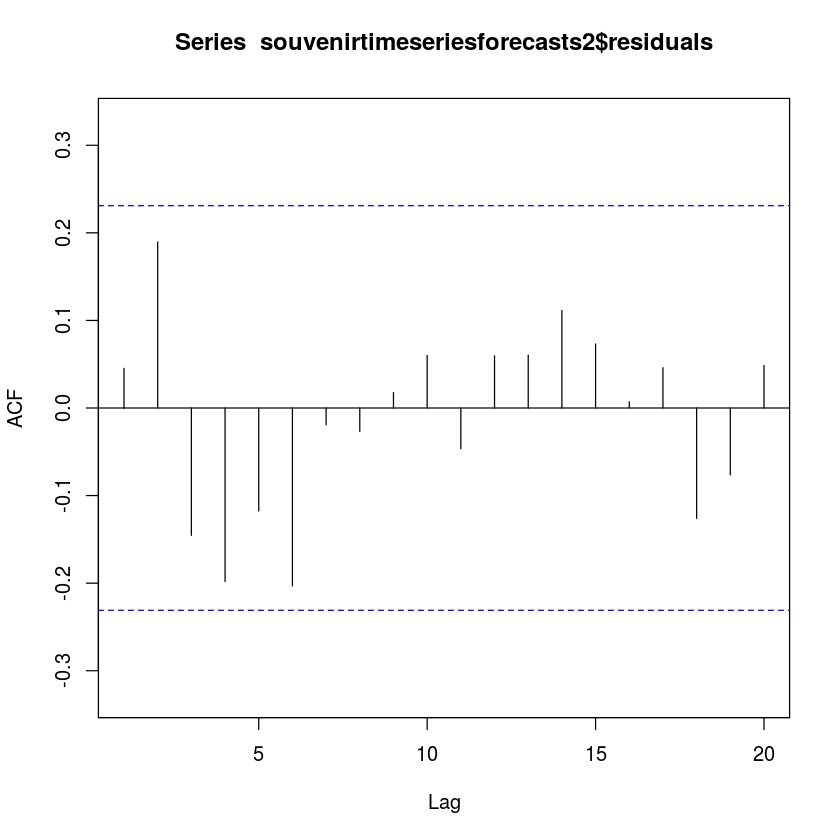

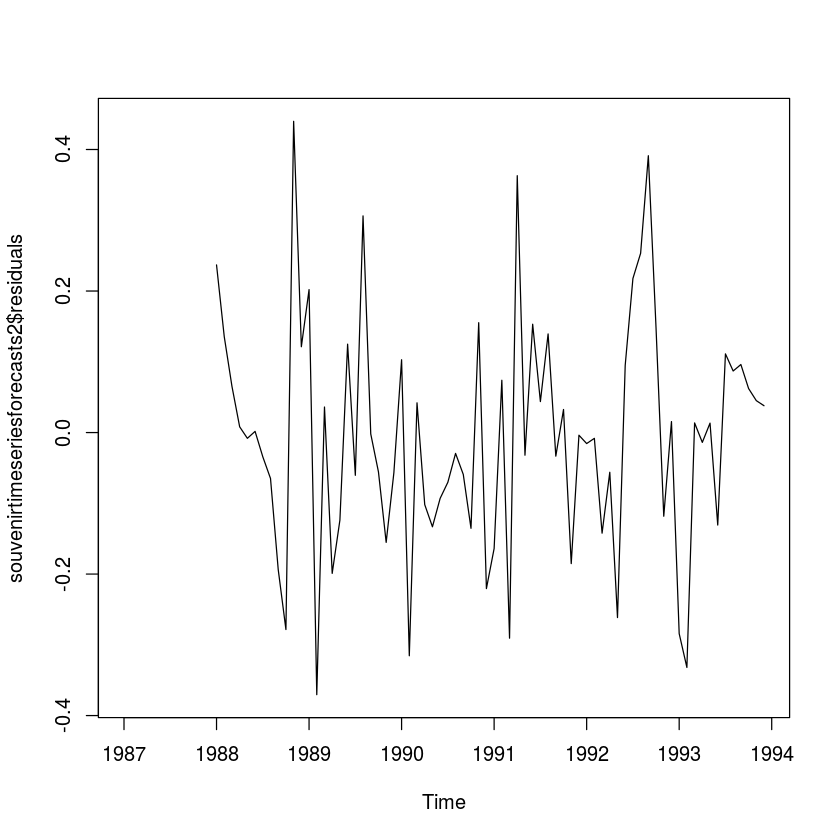

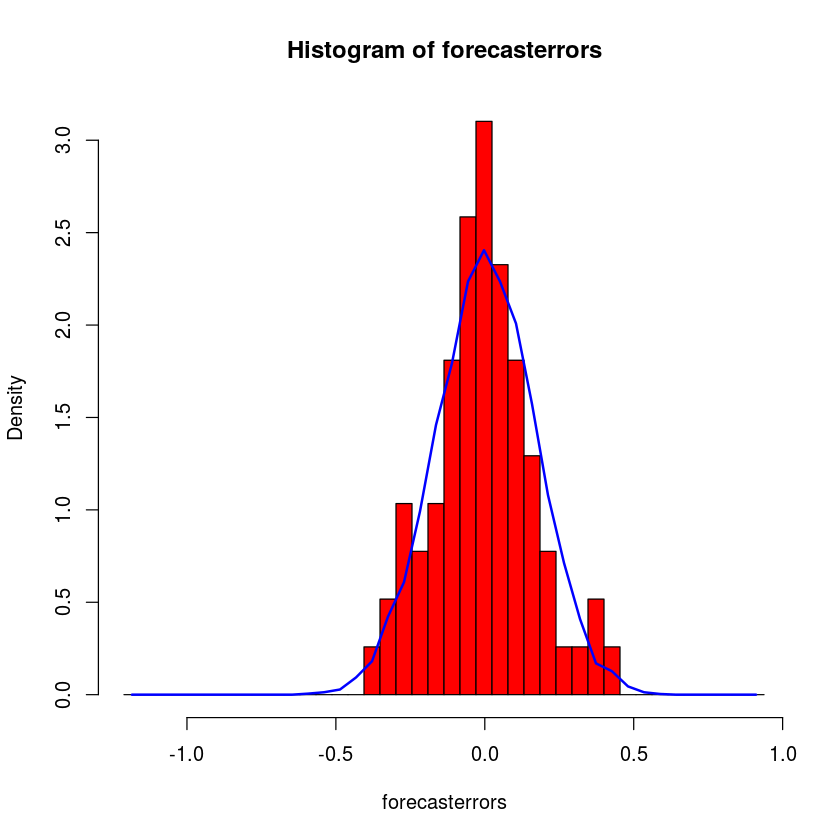

In [107]:
Acf(souvenirtimeseriesforecasts2$residuals, lag.max=20)
Box.test(souvenirtimeseriesforecasts2$residuals, lag=20, type="Ljung-Box")
plot.ts(souvenirtimeseriesforecasts2$residuals)            # make a time plot
plotForecastErrors(souvenirtimeseriesforecasts2$residuals) # make a histogram

In [ ]:
# Use accuracy() for measuring performance of model

## ARMA / ARIMA / ARIMAX & Others

Exponential smoothing methods are useful for making forecasts, and make no assumptions about the correlations between successive values of the time series. However, if you want to make prediction intervals for forecasts made using exponential smoothing methods, the prediction intervals require that the forecast errors are uncorrelated and are normally distributed with mean zero and constant variance.

While exponential smoothing methods do not make any assumptions about correlations between successive values of the time series, in some cases you can make a better predictive model by taking correlations in the data into account. Autoregressive Integrated Moving Average (ARIMA) models include an explicit statistical model for the irregular component of a time series, that allows for non-zero autocorrelations in the irregular component.

**Differencing a Time Series**

ARIMA models are defined for stationary time series. Therefore, if you start off with a non-stationary time series, you will first need to ‘difference’ the time series until you obtain a stationary time series. If you have to difference the time series d times to obtain a stationary series, then you have an ARIMA(p,d,q) model, where d is the order of differencing used.

You can difference a time series using the “diff()” function in R

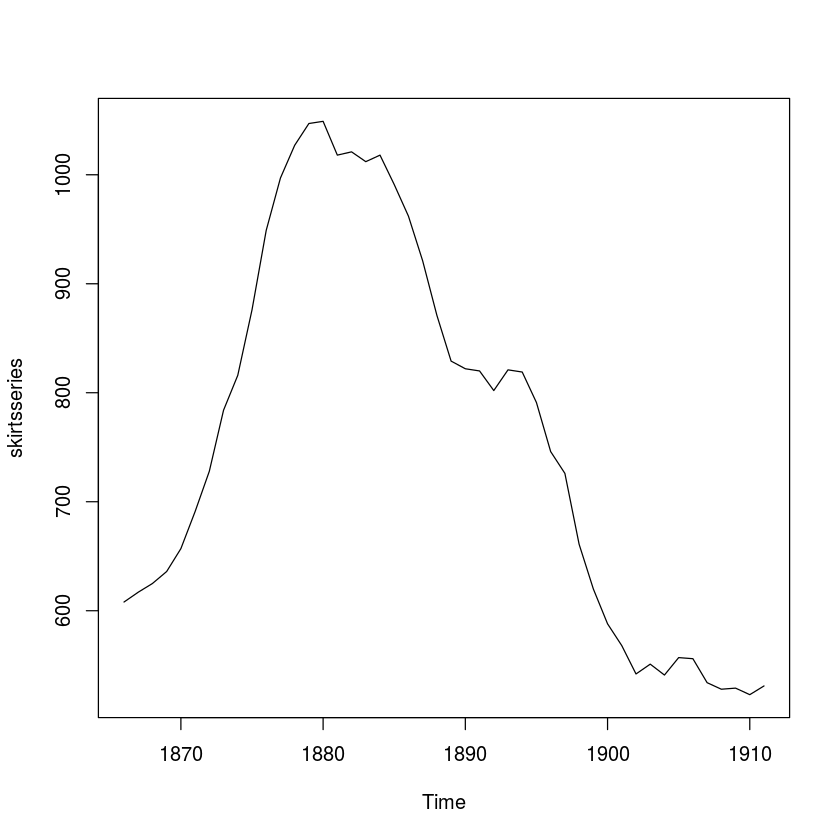

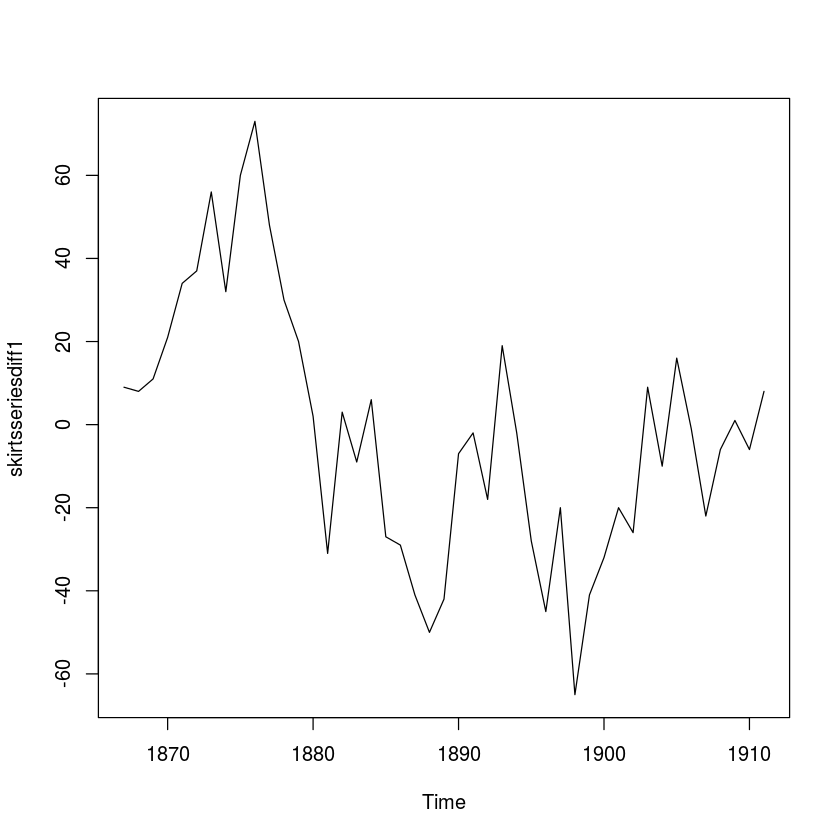

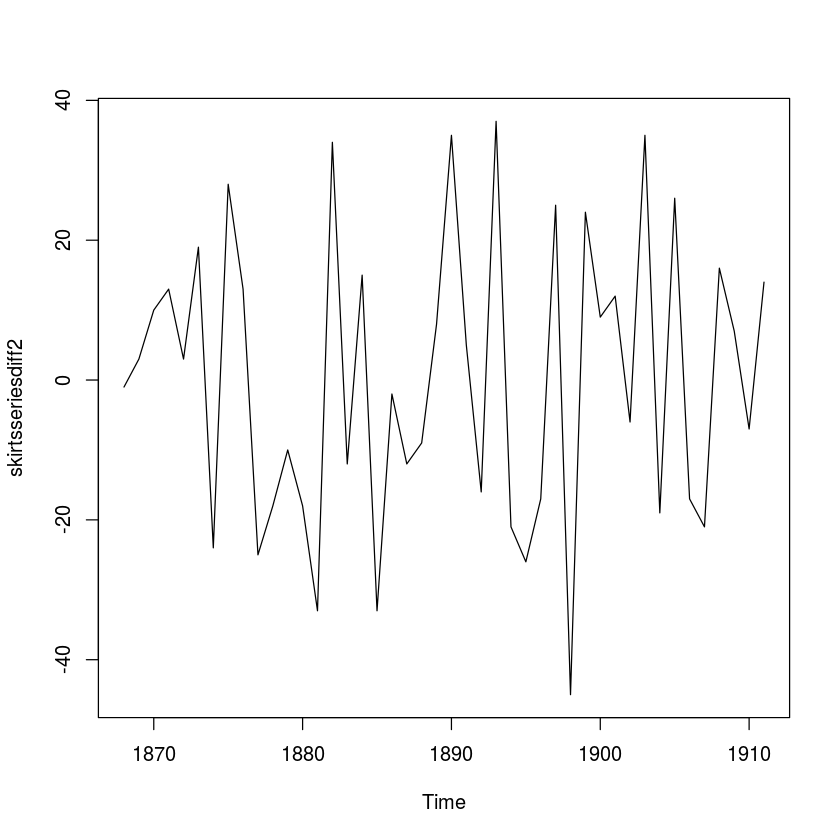

In [117]:
plot(skirtsseries)
skirtsseriesdiff1 = diff(skirtsseries, differences=1)
plot.ts(skirtsseriesdiff1)
skirtsseriesdiff2 = diff(skirtsseries, differences=2)
plot.ts(skirtsseriesdiff2)

**Selecting a Candidate ARIMA Model**


If your time series is stationary, or if you have transformed it to a stationary time series by differencing d times, the next step is to select the appropriate ARIMA model, which means finding the values of most appropriate values of p and q for an ARIMA(p,d,q) model. To do this, you usually need to examine the correlogram and partial correlogram of the stationary time series.

To plot a correlogram and partial correlogram, we can use the “acf()” and “pacf()” functions in R, respectively. To get the actual values of the autocorrelations and partial autocorrelations, we set “plot=FALSE” in the “acf()” and “pacf()” functions.

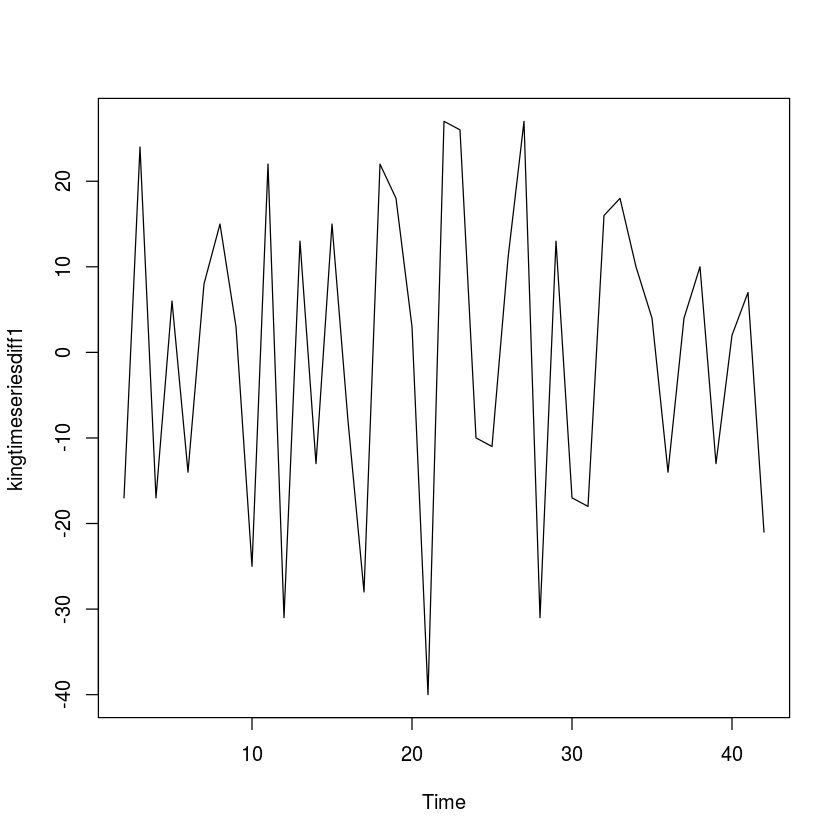


Autocorrelations of series ‘kingtimeseriesdiff1’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.360 -0.162 -0.050  0.227 -0.042 -0.181  0.095  0.064 -0.116 -0.071 
    11     12     13     14     15     16     17     18     19     20 
 0.206 -0.017 -0.212  0.130  0.114 -0.009 -0.192  0.072  0.113 -0.093 

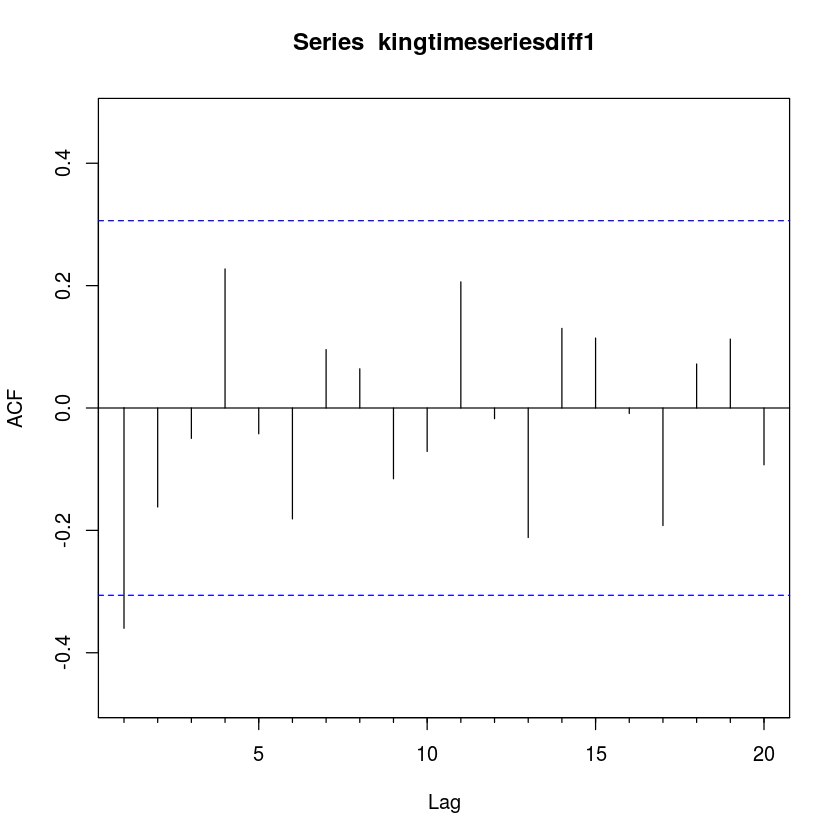

In [119]:
kingtimeseriesdiff1 = diff(kingstimeseries, differences=1)
plot.ts(kingtimeseriesdiff1)

Acf(kingtimeseriesdiff1, lag.max=20)             # plot a correlogram
Acf(kingtimeseriesdiff1, lag.max=20, plot=FALSE) # get the autocorrelation values


We see from the correlogram that the autocorrelation at lag 1 (-0.360) exceeds the significance bounds, but all other autocorrelations between lags 1-20 do not exceed the significance bounds.

To plot the partial correlogram for lags 1-20 for the once differenced time series of the ages at death of the English kings, and get the values of the partial autocorrelations, we use the “pacf()” function, by typing:




Partial autocorrelations of series ‘kingtimeseriesdiff1’, by lag

     1      2      3      4      5      6      7      8      9     10     11 
-0.360 -0.335 -0.321  0.005  0.025 -0.144 -0.022 -0.007 -0.143 -0.167  0.065 
    12     13     14     15     16     17     18     19     20 
 0.034 -0.161  0.036  0.066  0.081 -0.005 -0.027 -0.006 -0.037 

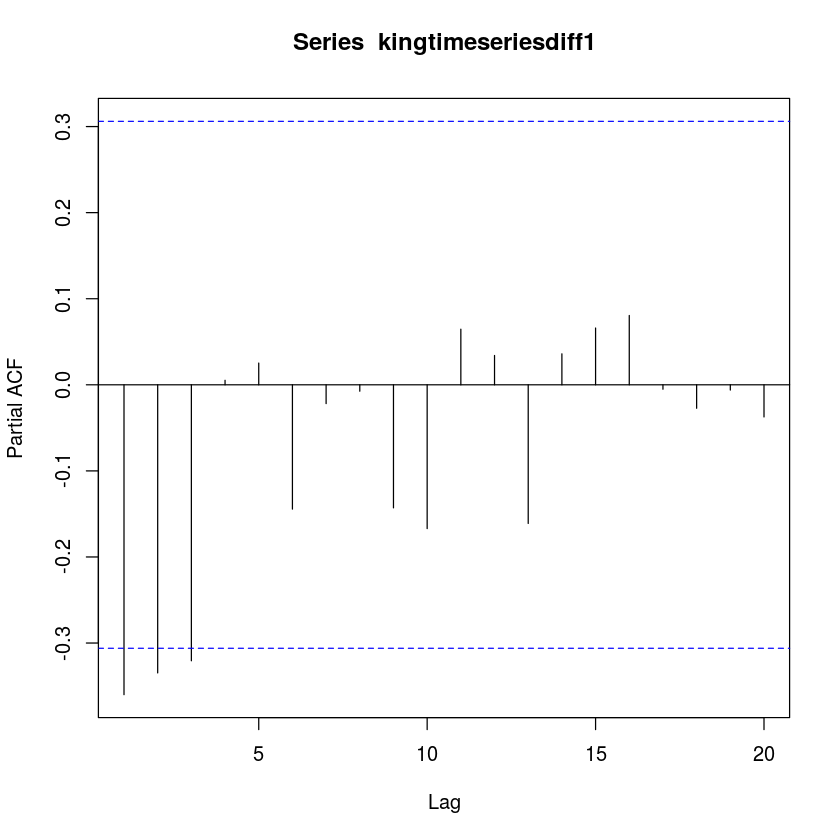

In [120]:
pacf(kingtimeseriesdiff1, lag.max=20)             # plot a partial correlogram
pacf(kingtimeseriesdiff1, lag.max=20, plot=FALSE) # get the partial autocorrelation values


The partial correlogram shows that the partial autocorrelations at lags 1, 2 and 3 exceed the significance bounds, are negative, and are slowly decreasing in magnitude with increasing lag (lag 1: -0.360, lag 2: -0.335, lag 3:-0.321). The partial autocorrelations tail off to zero after lag 3.

Since the correlogram is zero after lag 1, and the partial correlogram tails off to zero after lag 3, this means that the following ARMA (autoregressive moving average) models are possible for the time series of first differences:

an ARMA(3,0) model, that is, an autoregressive model of order p=3, since the partial autocorrelogram is zero after lag 3, and the autocorrelogram tails off to zero (although perhaps too abruptly for this model to be appropriate)
an ARMA(0,1) model, that is, a moving average model of order q=1, since the autocorrelogram is zero after lag 1 and the partial autocorrelogram tails off to zero
an ARMA(p,q) model, that is, a mixed model with p and q greater than 0, since the autocorrelogram and partial correlogram tail off to zero (although the correlogram probably tails off to zero too abruptly for this model to be appropriate)
We use the principle of parsimony to decide which model is best: that is, we assume that the model with the fewest parameters is best. The ARMA(3,0) model has 3 parameters, the ARMA(0,1) model has 1 parameter, and the ARMA(p,q) model has at least 2 parameters. Therefore, the ARMA(0,1) model is taken as the best model.

Other parameters like MAE/ MAPE etc. can also be used for model evaluation

An ARMA(0,1) model is a moving average model of order 1, or MA(1) model. This model can be written as: X_t - mu = Z_t - (theta * Z_t-1), where X_t is the stationary time series we are studying (the first differenced series of ages at death of English kings), mu is the mean of time series X_t, Z_t is white noise with mean zero and constant variance, and theta is a parameter that can be estimated.

A MA (moving average) model is usually used to model a time series that shows short-term dependencies between successive observations. Intuitively, it makes good sense that a MA model can be used to describe the irregular component in the time series of ages at death of English kings, as we might expect the age at death of a particular English king to have some effect on the ages at death of the next king or two, but not much effect on the ages at death of kings that reign much longer after that.

**Shortcut: the auto.arima() function**

The auto.arima() function can be used to find the appropriate ARIMA model, eg., type “library(forecast)”, then “auto.arima(kings)”. The output says an appropriate model is ARIMA(0,1,1).

Since an ARMA(0,1) model (with p=0, q=1) is taken to be the best candidate model for the time series of first differences of the ages at death of English kings, then the original time series of the ages of death can be modelled using an ARIMA(0,1,1) model (with p=0, d=1, q=1, where d is the order of differencing required).

### Forecasting Using an ARIMA Model


Call:
arima(x = kingstimeseries, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.7218
s.e.   0.1208

sigma^2 estimated as 230.4:  log likelihood = -170.06,  aic = 344.13

   Point Forecast    Lo 80    Hi 80    Lo 95     Hi 95
43       67.75063 48.29647 87.20479 37.99806  97.50319
44       67.75063 47.55748 87.94377 36.86788  98.63338
45       67.75063 46.84460 88.65665 35.77762  99.72363
46       67.75063 46.15524 89.34601 34.72333 100.77792
47       67.75063 45.48722 90.01404 33.70168 101.79958

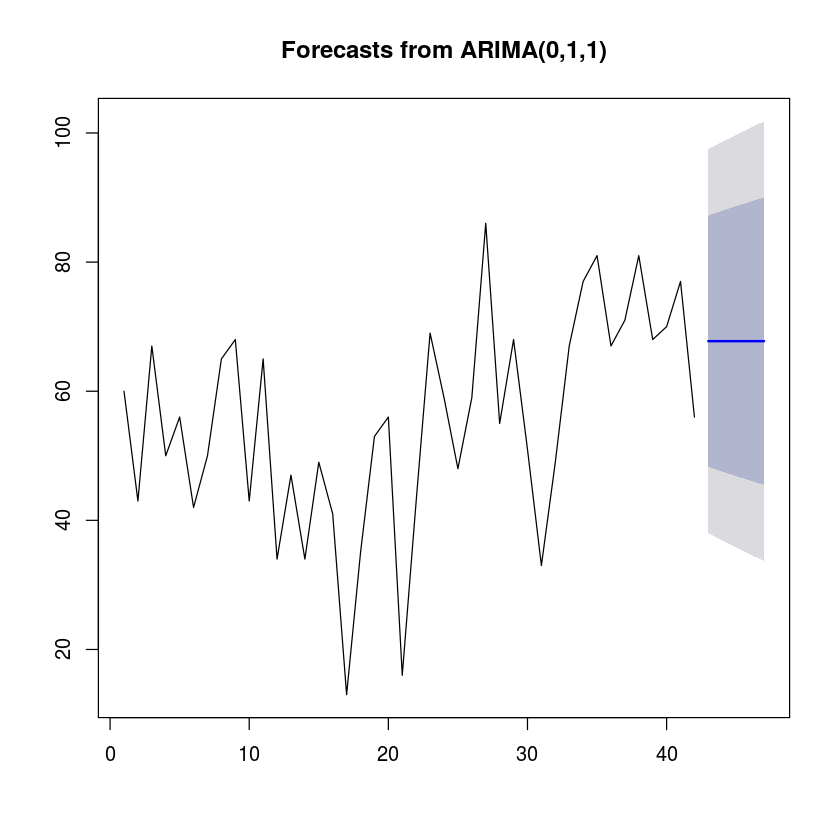

In [126]:
kingstimeseriesarima = arima(kingstimeseries, order=c(0,1,1)) # fit an ARIMA(0,1,1) model
kingstimeseriesarima

kingstimeseriesforecasts = forecast(kingstimeseriesarima, h=5)
kingstimeseriesforecasts

plot(kingstimeseriesforecasts)


	Box-Ljung test

data:  kingstimeseriesforecasts$residuals
X-squared = 13.584, df = 20, p-value = 0.8509


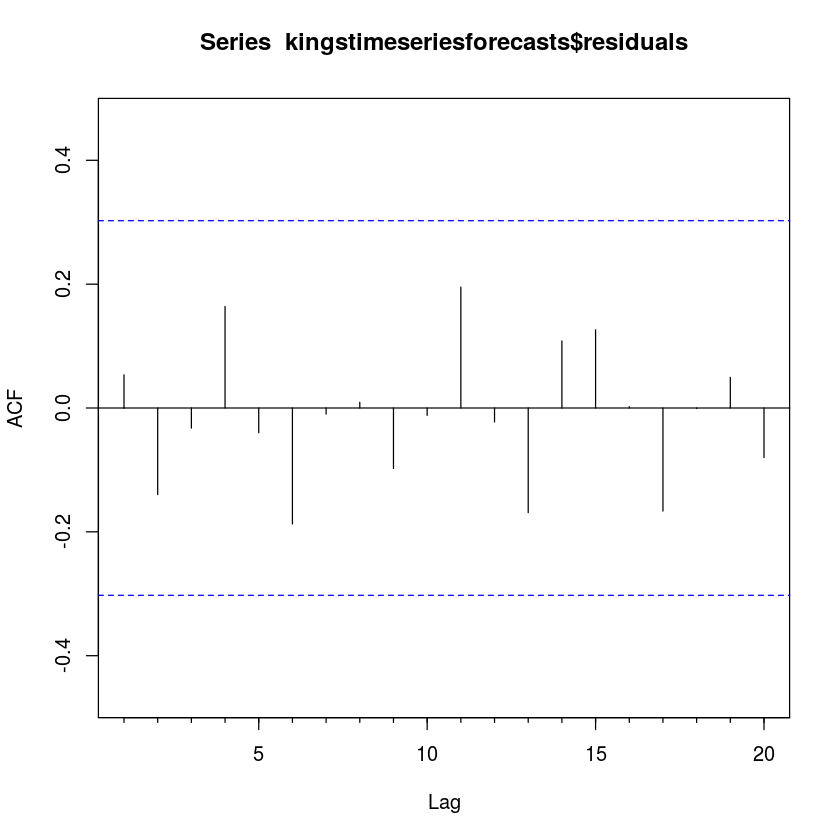

In [127]:
Acf(kingstimeseriesforecasts$residuals, lag.max=20)
Box.test(kingstimeseriesforecasts$residuals, lag=20, type="Ljung-Box")

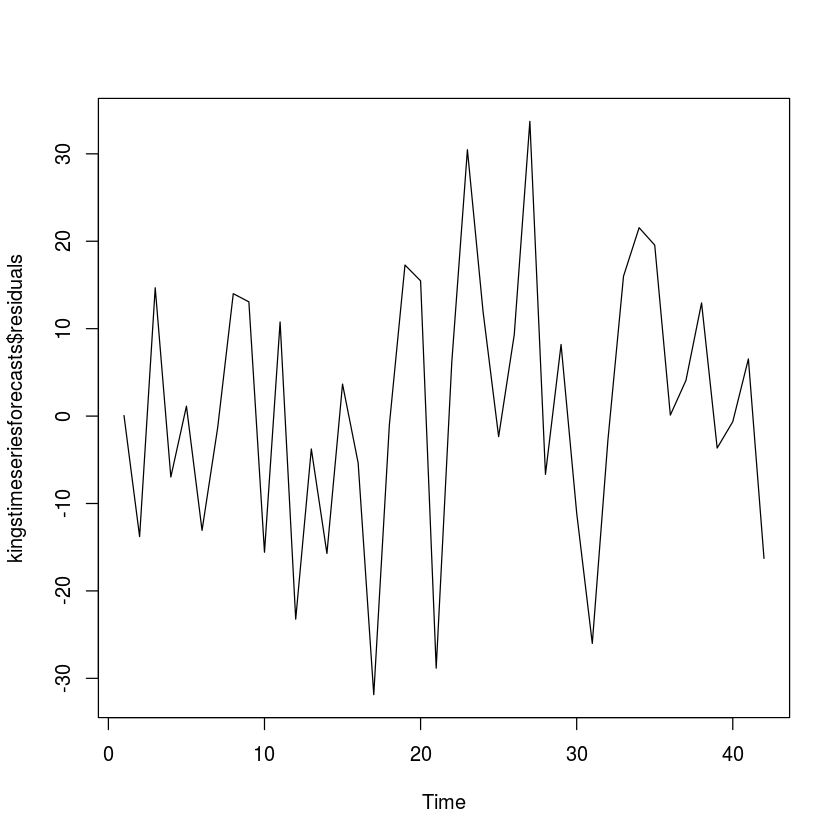

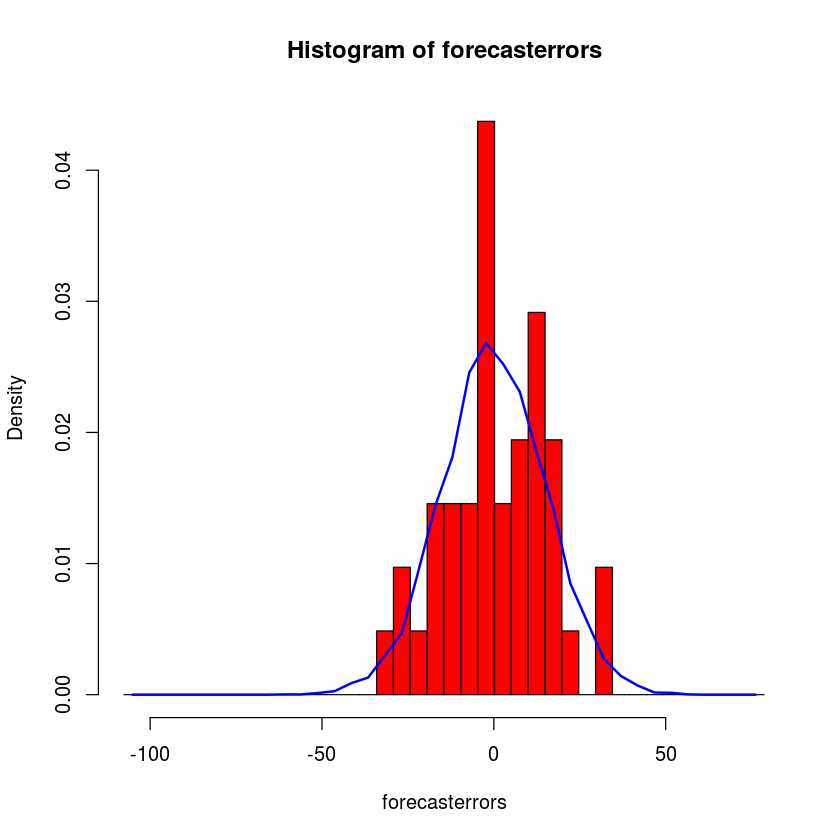

In [128]:
plot.ts(kingstimeseriesforecasts$residuals)            # make time plot of forecast errors
plotForecastErrors(kingstimeseriesforecasts$residuals) # make a histogram